<a href="https://colab.research.google.com/github/Adibfikal/NLP-Datasets-for-Dicoding/blob/main/NLP_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Default Code with Correction

In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from pandas_datareader import data as pdr
import yfinance as yf

In [55]:
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("TSLA", start="2014-01-01", end="2020-05-12")

[*********************100%%**********************]  1 of 1 completed


In [56]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,9.986667,10.165333,9.770000,10.006667,10.006667,92826000
2014-01-03,10.000000,10.146000,9.906667,9.970667,9.970667,70425000
2014-01-06,10.000000,10.026667,9.682667,9.800000,9.800000,80416500
2014-01-07,9.841333,10.026667,9.683333,9.957333,9.957333,75511500
2014-01-08,9.923333,10.246667,9.917333,10.085333,10.085333,92448000


In [26]:
training_set = data.iloc[:800, 1:2].values
test_set = data.iloc[800:, 1:2].values

In [27]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [28]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 13s 98ms/step - loss: 0.0770
Epoch 2/100
24/24 [==============================] - 2s 99ms/step - loss: 0.0253
Epoch 3/100
24/24 [==============================] - 2s 100ms/step - loss: 0.0204
Epoch 4/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0177
Epoch 5/100
24/24 [==============================] - 3s 132ms/step - loss: 0.0168
Epoch 6/100
24/24 [==============================] - 2s 99ms/step - loss: 0.0141
Epoch 7/100
24/24 [==============================] - 2s 98ms/step - loss: 0.0155
Epoch 8/100
24/24 [==============================] - 2s 99ms/step - loss: 0.0128
Epoch 9/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0124
Epoch 10/100
24/24 [==============================] - 3s 137ms/step - loss: 0.0117
Epoch 11/100
24/24 [==============================] - 2s 98ms/step - loss: 0.0112
Epoch 12/100
24/24 [==============================] - 5s 194ms/step - loss: 0.0109
Epoch 13/100
24/24

In [81]:
dataset_train = data.iloc[:800, 1:2]
dataset_test = data.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test):].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = np.array(inputs)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [83]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

25/25 [==============================] - 3s 3ms/step


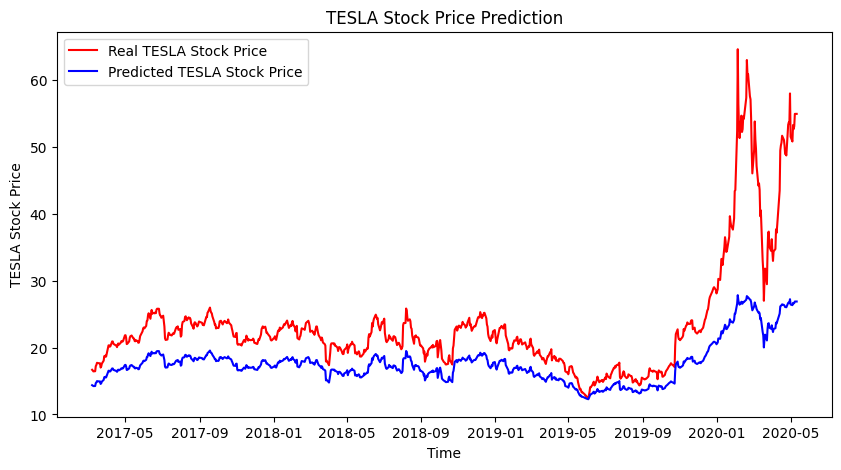

In [93]:
plt.figure(figsize=(10, 5))
plt.plot(data[800:].index.values, dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(data[800:].index.values, predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

###New Code

In [66]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, LSTM, Bidirectional, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [67]:
url = r"https://raw.githubusercontent.com/Adibfikal/NLP-Datasets-for-Dicoding/main/Emotion_classify_Data.csv"
!wget --no-cache --backups=1 {url}

--2023-12-26 11:36:31--  https://raw.githubusercontent.com/Adibfikal/NLP-Datasets-for-Dicoding/main/Emotion_classify_Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 614056 (600K) [text/plain]
Saving to: ‘Emotion_classify_Data.csv’

Emotion_classify_Da 100%[===================>] 599.66K  --.-KB/s    in 0.03s   

2023-12-26 11:36:31 (20.6 MB/s) - ‘Emotion_classify_Data.csv’ saved [614056/614056]



In [68]:
df = pd.read_csv('/content/Emotion_classify_Data.csv')

In [69]:
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [70]:
le = LabelEncoder()

target = le.fit_transform(df.Emotion.values)

feature = df.Comment.values
target = to_categorical(target, 3)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.15, random_state=42)

In [73]:
tokenizer = Tokenizer(num_words=10000, oov_token='-')

In [99]:
tokenizer.fit_on_texts(X_train)

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

train_padded = pad_sequences(
    train_sequences,
    64,
    padding='post',
)

test_padded = pad_sequences(
    test_sequences,
    64,
    padding='post',
)

In [100]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=16),

    Bidirectional(LSTM(8, activity_regularizer='l1_l2', return_sequences=True)),
    Dropout(0.3),
    BatchNormalization(),

    Bidirectional(LSTM(16, return_sequences=True)),
    Dropout(0.3),
    BatchNormalization(),

    Bidirectional(LSTM(32)),
    Dropout(0.3),
    BatchNormalization(),

    Dense(3, activation='softmax')
])

model.compile(loss='CategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, None, 16)          160000    
                                                                 
 bidirectional_44 (Bidirect  (None, None, 16)          1600      
 ional)                                                          
                                                                 
 dropout_32 (Dropout)        (None, None, 16)          0         
                                                                 
 batch_normalization_40 (Ba  (None, None, 16)          64        
 tchNormalization)                                               
                                                                 
 bidirectional_45 (Bidirect  (None, None, 32)          4224      
 ional)                                                          
                                                     

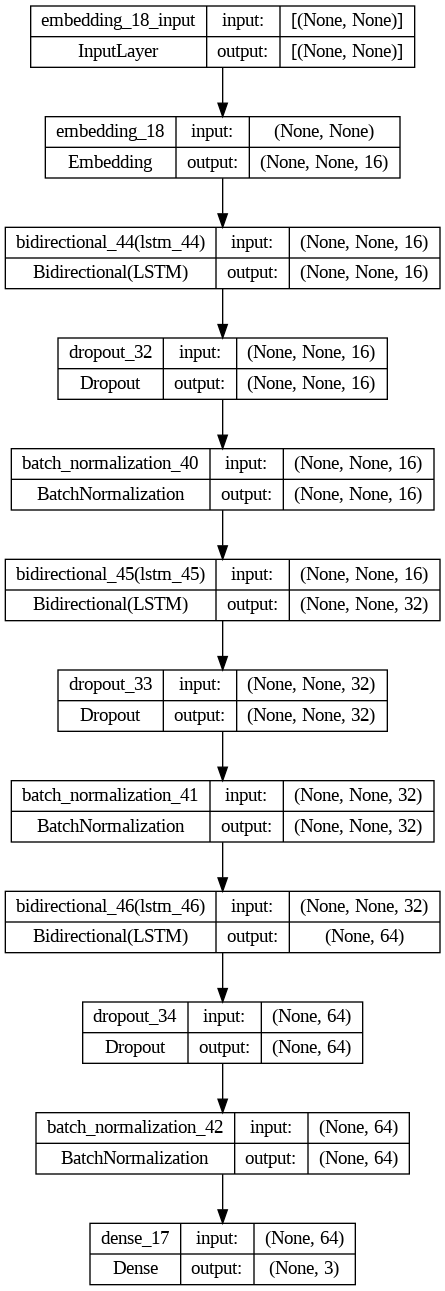

In [101]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [102]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [103]:
history = model.fit(train_padded,
                    y_train,
                    epochs=50,
                    validation_data=(test_padded, y_test),
                    callbacks=[callback],
                    verbose=2)

Epoch 1/50
158/158 - 25s - loss: 1.3837 - accuracy: 0.3914 - val_loss: 1.1812 - val_accuracy: 0.3300 - 25s/epoch - 158ms/step
Epoch 2/50
158/158 - 6s - loss: 0.6770 - accuracy: 0.7543 - val_loss: 0.8327 - val_accuracy: 0.6779 - 6s/epoch - 37ms/step
Epoch 3/50
158/158 - 6s - loss: 0.2729 - accuracy: 0.9283 - val_loss: 0.4475 - val_accuracy: 0.8507 - 6s/epoch - 35ms/step
Epoch 4/50
158/158 - 4s - loss: 0.1749 - accuracy: 0.9610 - val_loss: 0.4330 - val_accuracy: 0.8754 - 4s/epoch - 24ms/step
Epoch 5/50
158/158 - 7s - loss: 0.1082 - accuracy: 0.9824 - val_loss: 0.4804 - val_accuracy: 0.8777 - 7s/epoch - 44ms/step
Epoch 6/50
158/158 - 5s - loss: 0.1100 - accuracy: 0.9782 - val_loss: 0.5499 - val_accuracy: 0.8575 - 5s/epoch - 31ms/step
Epoch 7/50
158/158 - 4s - loss: 0.1008 - accuracy: 0.9808 - val_loss: 0.5620 - val_accuracy: 0.8743 - 4s/epoch - 26ms/step
Epoch 8/50
158/158 - 4s - loss: 0.0787 - accuracy: 0.9865 - val_loss: 0.6156 - val_accuracy: 0.8698 - 4s/epoch - 27ms/step
Epoch 9/50
15

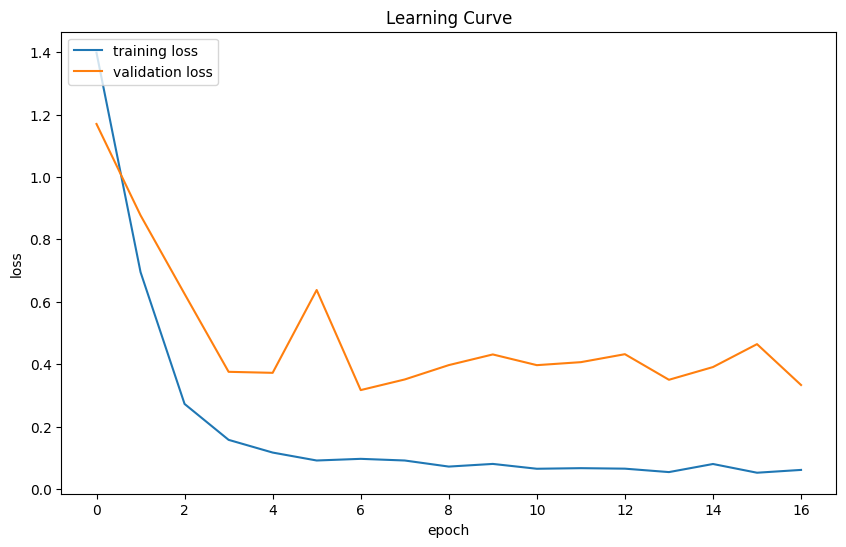

In [86]:
plt.figure(figsize=(10, 6))
plt.title('Learning Curve')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

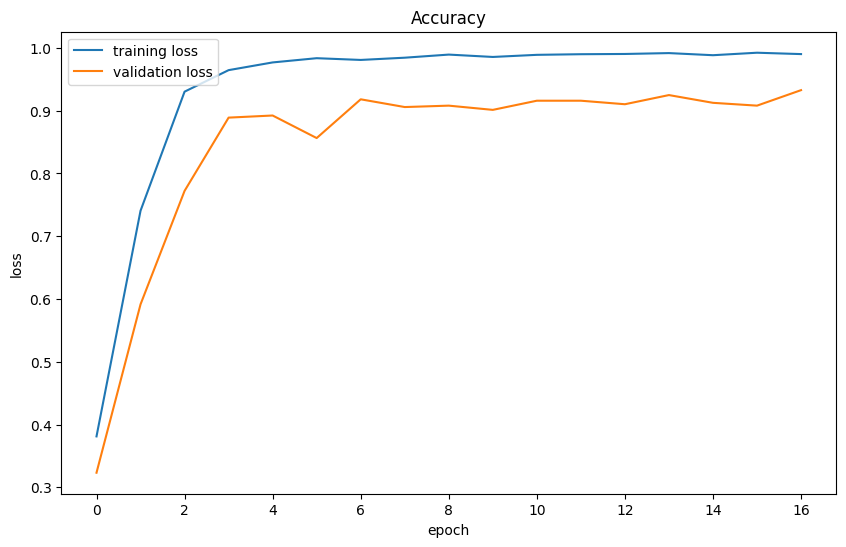

In [87]:
plt.figure(figsize=(10, 6))
plt.title('Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training loss', 'validation loss'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

**demo**

In [132]:
texts = [
    'im frustrated that my internet is so slow',
    'im scared of failing my exams',
    'i got a promotion today'
]

input_texts = pad_sequences(tokenizer.texts_to_sequences(texts), 64, padding='post')

y_pred = model.predict(input_texts, verbose=0)

classes = le.inverse_transform(np.argmax(y_pred, axis = 1))

for i in range(3):
  print(f'({i+1}). Here is what you said: \n{texts[i]}.')
  print('You are in', classes[i], end='\n\n')

(1). Here is what you said: 
im frustrated that my internet is so slow.
You are in anger

(2). Here is what you said: 
im scared of failing my exams.
You are in fear

(3). Here is what you said: 
i got a promotion today.
You are in joy

